In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as gbm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


In [2]:
#Data reading
train_data = pd.read_csv("data/preprocessed_train.csv")
test_data = pd.read_csv("data/preprocessed_test.csv")
train_data.head()
#test_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,22.0,1,0,7.2500,2,2
1,2,1,1,0,38.0,1,0,71.2833,0,3
2,3,1,3,0,26.0,0,0,7.9250,2,1
3,4,1,1,0,35.0,1,0,53.1000,2,3
4,5,0,3,1,35.0,0,0,8.0500,2,2


In [3]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,1,34.5,0,0,7.8292,1,2
1,893,3,0,47.0,1,0,7.0000,2,3
2,894,2,1,62.0,0,0,9.6875,1,2
3,895,3,1,27.0,0,0,8.6625,2,2
4,896,3,0,22.0,1,1,12.2875,2,3


In [4]:
#creating a dict for making submission files
test_predictions = {}

In [5]:
features = ['Pclass', "Sex", "Age", "SibSp", "Fare"]
X = train_data[features]
y = train_data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=44)
#Encode labels!
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
test = sc_X.transform(test_data[features])

In [6]:
#random forest (with gridsearch)

pipelineone = Pipeline([("RandomForest", RandomForestClassifier())])

param_grid = {"RandomForest__max_depth" : [3, 5],
              "RandomForest__min_samples_leaf" : [1,2,4],
              "RandomForest__min_samples_split" : [2,3,4],
              "RandomForest__max_features": ['auto', 'sqrt'],
              "RandomForest__n_estimators" : [100, 300]}


#Gridsearch takes in param_grid and pipeline

model = GridSearchCV(pipelineone, param_grid, cv=3)
model.fit(X_train, y_train)

#submission
y_pred_sub_randomf = model.predict(test)
y_pred_randomf = model.predict(X_test)
forest = accuracy_score(y_test, y_pred_randomf)

#add an entry to the dict:
test_predictions["RandomForest"]=y_pred_sub_randomf


/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [7]:
y_pred_sub_randomf

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [8]:
#model = RandomForestClassifier(n_estimators=100, max_depth=3)
#model.fit(X_train, y_train)
#pr = model.predict(test_data[features])

In [9]:
#random forest result
print(forest)

0.8426966292134831


In [10]:
#logistic regression (with gridsearch)

#[0.001, 0.01, 0.1, 1, 10, 100, 1000]

pipelinetwo = Pipeline([("logisticregression", LogisticRegression(max_iter=100))])
param_grid = {"logisticregression__penalty" : ["l2"],
              "logisticregression__C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              "logisticregression__solver" : ["liblinear"]}

#Gridsearch takes in param_grid and pipeline.
model = GridSearchCV(pipelinetwo, param_grid, cv =None)
model.fit(X_train, y_train)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_sub_logistic = model.predict(test)
logistic = accuracy_score(y_test, y_pred)

#add an entry to the dict:
test_predictions["LogisticRegression"]=y_pred_sub_logistic


In [11]:
print(logistic)

0.8014981273408239


In [12]:
y_pred_sub_logistic

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

Feature: 0, Score: -2.00538
Feature: 1, Score: -2.38200
Feature: 2, Score: -2.11909
Feature: 3, Score: -1.30942
Feature: 4, Score: 0.19581


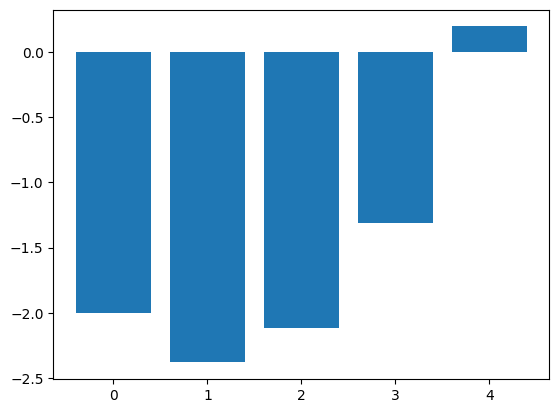

In [13]:
#get importance of features

importance = model.coef_[0]
#summarize featuer importance
for i, v in enumerate(importance):
    print("Feature: %0d, Score: %.5f" % (i,v))

#plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [14]:
#XGBoost

xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
y_pred_sub_xgb_untuned = xg.predict(test)
XGB = accuracy_score(y_test, y_pred)
print(XGB)

#add an entry to the dict:
test_predictions["XGBoost_Untuned"]=y_pred_sub_xgb_untuned

0.8014981273408239


In [22]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'random_state': [10],
    # Add more parameters to tune
}

# Create an XGBoost classifier object
xg = XGBClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model
XGB_tuned_accuracy = best_model.score(X_test, y_test)
print("Best Parameters:", best_params)
print("Accuracy:", XGB_tuned_accuracy)
y_pred_sub_xgb = grid_search.predict(test)

#add an entry to the dict:
test_predictions["XGBoost"]=y_pred_sub_xgb



Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_state': 10, 'subsample': 0.8}
Accuracy: 0.8239700374531835


In [16]:
#KNeighborsClassifier
KN = KNeighborsClassifier(n_neighbors=3)
KN.fit(X_train, y_train)
y_pred = KN.predict(X_test)
knn = accuracy_score(y_test, y_pred)
y_pred_sub_knn = KN.predict(test)
print(knn)

0.8127340823970037


In [17]:
#SVC = support vector classifier

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
SVC_score = accuracy_score(y_test, y_pred)
y_pred_sub_svc = svc.predict(test)
print(SVC_score)

#add an entry to the dict:
test_predictions["SVC"]=y_pred_sub_svc

0.8314606741573034


In [18]:
#Linear SVC

lsvc = LinearSVC(random_state=0)
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)
LSVC = accuracy_score(y_test, y_pred)
y_pred_sub_lsvc = lsvc.predict(test)
print(LSVC)

#add an entry to the dict:
test_predictions["LSVC"]=y_pred_sub_lsvc

0.797752808988764


In [23]:
#Final leader board
finalleaderboard = {
    "Random Forest" : forest,
    "logistic regression" : logistic,
    "XGBoost" : XGB,
    "XGBoost tuned" : XGB_tuned_accuracy,
    "KNeighborsClassifier" : knn,
    "SVC" : SVC_score,
    "Linear SVC" : LSVC
}

finalleaderboard = pd.DataFrame.from_dict(finalleaderboard, orient = "index", columns = ["Accuracy"])
print(finalleaderboard)

                      Accuracy
Random Forest         0.842697
logistic regression   0.801498
XGBoost               0.801498
XGBoost tuned         0.823970
KNeighborsClassifier  0.812734
SVC                   0.831461
Linear SVC            0.797753


In [ ]:
#Make a submission for competition:

for key in test_predictions:
    output = pd.DataFrame({"PassengerId": test_data.PassengerId, "Survived" : test_predictions[key]})
    output.to_csv("predictions/"+key+".csv", index=False)

print("Done!")

Done!


In [ ]:
test_data.PassengerId.shape, y_pred_sub_xgb.shape


((418,), (418,))

In [ ]:
print(np.count_nonzero(y_pred))
#Number of predicted survived:

104
